# import

In [27]:

from Utilities.utils import *

# Get the current working directory
current_working_dir = os.path.join(Path(os.getcwd()).parent,'data') 
ED5_data_dict = load_h5(os.path.join(current_working_dir,r"ED5_data.h5"))

# figure A

ShapiroResult(statistic=np.float64(0.9547968582522977), pvalue=np.float64(0.7077844361790105))
ShapiroResult(statistic=np.float64(0.8884986168405241), pvalue=np.float64(0.11270468066831035))
TtestResult(statistic=np.float64(-12.174829248104608), pvalue=np.float64(1.0024376812768496e-07), df=np.int64(11))
3.514570471865462


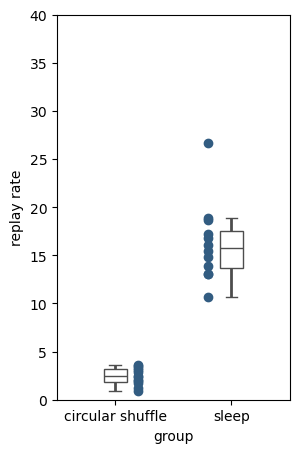

In [36]:
circular_shuffle_df = ED5_data_dict['circular_shuffle_df']

shuffle_events_per_min = circular_shuffle_df.c_shuffled_epm.values
non_shuff_events_per_min = circular_shuffle_df.non_shuffled_epm.values

fig, ax = plt.subplots(1, 1, figsize=(3, 5))
ax.plot([0.2]*len(shuffle_events_per_min),shuffle_events_per_min,'o', color = "#325C81")
ax.plot([0.8]*len(non_shuff_events_per_min),non_shuff_events_per_min,'o', color = '#325C81')
ax.set_ylim(0,40)
plt_df = pd.DataFrame({'group': (['circular shuffle'] * len(shuffle_events_per_min)) + (['sleep'] * len(non_shuff_events_per_min)) , 'replay rate': list(shuffle_events_per_min)+list(non_shuff_events_per_min)})
ax = sns.boxplot(y='replay rate', x='group', data=plt_df, color='blue', width=.2, zorder=10,
                    showcaps=True, boxprops={'facecolor': 'none', "zorder": 10},
                    showfliers=False, whiskerprops={'linewidth': 2, "zorder": 10},
                    saturation=1, orient='v')

#STATS
print(scipy.stats.shapiro(shuffle_events_per_min))
print(scipy.stats.shapiro(non_shuff_events_per_min))
#paired t-test
print(scipy.stats.ttest_rel(shuffle_events_per_min, non_shuff_events_per_min))
diff =  non_shuff_events_per_min - shuffle_events_per_min
cohen_d = diff.mean() / diff.std(ddof=1)
print(cohen_d)



# figure B

ShapiroResult(statistic=np.float64(0.9547968582522977), pvalue=np.float64(0.7077844361790105))
ShapiroResult(statistic=np.float64(0.8884986168405241), pvalue=np.float64(0.11270468066831035))
WilcoxonResult(statistic=np.float64(0.0), pvalue=np.float64(0.00048828125))
Rank-biserial r: 1.0


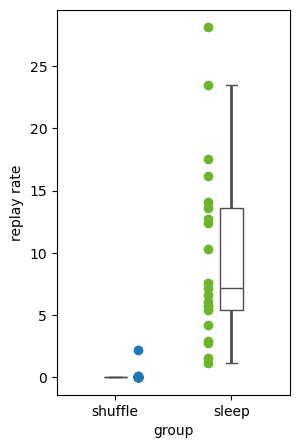

In [37]:
post_reactivations_per_min = ED5_data_dict['shuffle_df'].expert_reactivation_per_min.values
shuffle_reactivations_per_min = ED5_data_dict['shuffle_df'].shuffle_reactivations_per_min.values

fig, ax = plt.subplots(1, 1, figsize=(3, 5))

plt.plot(len(shuffle_reactivations_per_min)*[0.2],shuffle_reactivations_per_min[-21::],'o')
plt.plot(len(shuffle_reactivations_per_min)*[0.8], post_reactivations_per_min, 'o', color = '#6DB52D') 


plt_df = pd.DataFrame({'group': (['shuffle'] * len(shuffle_reactivations_per_min)) + (['sleep'] * len(post_reactivations_per_min)) , 'replay rate': list(shuffle_reactivations_per_min)+list(post_reactivations_per_min)})
ax = sns.boxplot(y='replay rate', x='group', data=plt_df, color='blue', width=.2, zorder=10,
                    showcaps=True, boxprops={'facecolor': 'none', "zorder": 10},
                    showfliers=False, whiskerprops={'linewidth': 2, "zorder": 10},
                    saturation=1, orient='v')   

#STATS

# Normality checks (optional, but keeping your structure)
print(stats.shapiro(shuffle_events_per_min))
print(stats.shapiro(non_shuff_events_per_min))

# Wilcoxon signed-rank test (paired, non-parametric)
wilcoxon_res = stats.wilcoxon(
    non_shuff_events_per_min,
    shuffle_events_per_min,
    zero_method="wilcox",
    alternative="two-sided")
print(wilcoxon_res)

# Rank-biserial

diff = non_shuff_events_per_min - shuffle_events_per_min
diff = diff[diff != 0]  # Wilcoxon ignores zero differences
n = len(diff)

ranks = stats.rankdata(abs(diff))
W_pos = np.sum(ranks[diff > 0])
W_neg = np.sum(ranks[diff < 0])

rank_biserial_r = (W_pos - W_neg) / (n * (n + 1) / 2)
print("Rank-biserial r:", rank_biserial_r)


# figure D

------------------ expert only regression ------------------------------------------
r = -0.608197882078153
r^2 = 0.3699046637643508
p-value = 0.0


c:\Users\Emmett Thompson\Documents\procedural_replay_paper_2025\ED_5\Utilities\utils.py:133: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_means = df.groupby('bin')['x'].mean()
c:\Users\Emmett Thompson\Documents\procedural_replay_paper_2025\ED_5\Utilities\utils.py:134: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_std = df.groupby('bin')['x'].std()


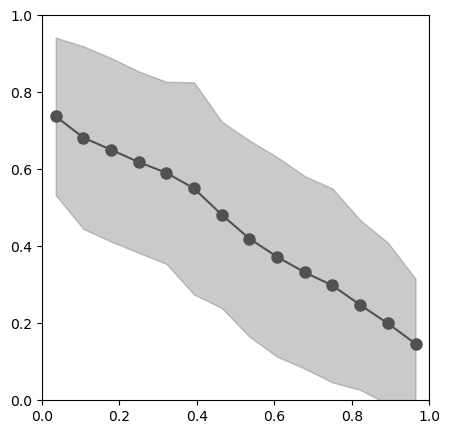

In [38]:
post_master = ED5_data_dict['post_dict']

fig, ax = plt.subplots(1, 1,figsize=(5, 5))
x = post_master['neuron_rel_reverse_replay_positions']
x = [item for sublist in x for item in sublist]
y = post_master['neuron_rel_awake_positions_reverse']
y = [item for sublist in y for item in sublist]
a,b = plot_sleep_awake_spike_position(ax,x,y, '#515151')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])

print('------------------ expert only regression ------------------------------------------')
import statsmodels.api as sm
group1_data = {'x': x, 'y': y}
df1 = pd.DataFrame(group1_data)
# Add a constant term to the independent variable
data = sm.add_constant(df1)
# data = sm.add_constant(df2)

# Fit the regression model
model = sm.OLS(data['y'], data[['const', 'x']],missing='drop').fit()

# Print the summary statistics
# print(model.summary())

r = np.sign(model.params['x']) * np.sqrt(model.rsquared)


print(f"r = {r}")
print(f"r^2 = {model.rsquared}")
print(f"p-value = {model.pvalues['x']}")


# figure E

Text(0, 0.5, 'total events %')

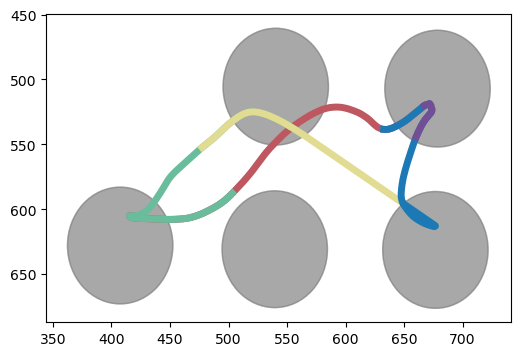

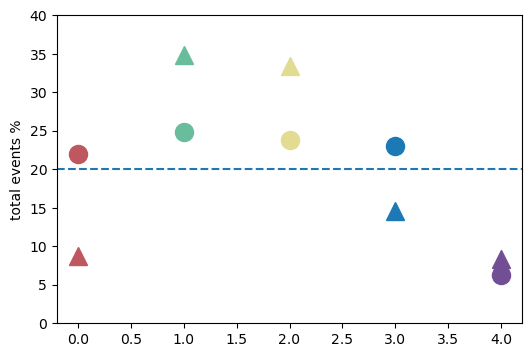

In [39]:


continuous_regions_df = ED5_data_dict['continuous_regions_df']
standard_av_curve = ED5_data_dict['standard_av_curve']
port_centroids = ED5_data_dict['port_centroids']

seq_colours = ['---',
 '#E2DC92',
 '#C6963E',
 '#724F94',
 '#69BD9D',
 '#BE575F',
 '#1C79B5',
 '#264999']

start_end_intermediate = []
fig, axs = plt.subplots(1, 1, figsize=(6 , 4))

num_intermediate_points = 5
for i, row in continuous_regions_df.iterrows():
    buffer_ = 2  # 2% buffer on each side
    start = row.start - buffer_
    end = row.end + buffer_
    
    # Handle circular nature at 100%
    if start < 0:
        start += 100
    if end > 100:
        end -= 100
    
    # Compute percentage points
    if start < end:
        positions = np.linspace(start, end, num_intermediate_points + 2)[1:-1]  # Exclude start and end
    else:  # Wraps around 100%
        positions = np.linspace(0, (100-start)+end, num_intermediate_points + 2)[1:-1]  # Exclude start and end
        positions = start + positions
        positions = [position-100 if position>100 else position for position in positions]
    
    
    # Plot
    plot_percentage_interval(standard_av_curve, [start, end], port_centroids, axs, row.sequence, seq_colours[int(row.sequence) + 1],45)
    
#######################


with open(r"C:\Users\Emmett Thompson\Documents\procedural_replay_paper_2025\data\f3\awake_replay_proportions_dict.json") as f:
    awake_replay_proportions_dict = json.load(f)
    
    
awake_proportions = awake_replay_proportions_dict['awake_proportions']
replay_proportions = awake_replay_proportions_dict['replay_proportions']

fig, ax = plt.subplots(1, 1, figsize=(6 , 4))

seq_order = [4, 3, 0, 5, 2]

col = np.array(seq_colours)[np.array(seq_order)+1]

for i,item in enumerate(awake_proportions):
   ax.plot(i,awake_proportions[i]*100,'o', color = col[i], markersize = 13)
   ax.plot(i,replay_proportions[i]*100,'^', color = col[i], markersize = 13)
ax.axhline(20, linestyle = '--')
ax.set_ylim(0,40)
ax.set_ylabel('total events %')


# figure F

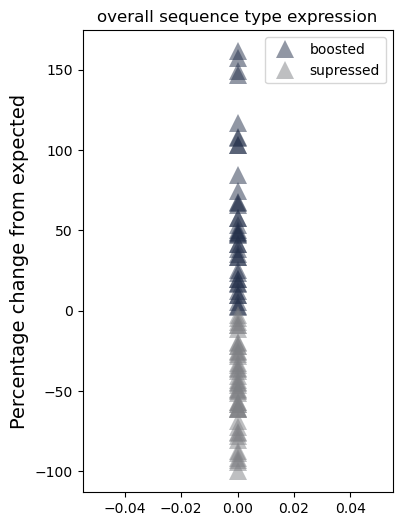

In [40]:
percentage_change_from_expected = ED5_data_dict['pcfe_values']


# 2. Create a figure and a single axes
fig, ax = plt.subplots(figsize=(4, 6))

ax.plot(np.zeros(len(percentage_change_from_expected[percentage_change_from_expected > 0])),percentage_change_from_expected[percentage_change_from_expected > 0],'^', c ="#25314B",markersize = 13,alpha = 0.5,label = 'boosted', markeredgewidth = 0)
ax.plot(np.zeros(len(percentage_change_from_expected[percentage_change_from_expected < 0])),percentage_change_from_expected[percentage_change_from_expected < 0],'^', c = "#7F8185", markersize = 13,alpha = 0.5,label = 'supressed', markeredgewidth = 0)

ax.set_ylabel('Percentage change from expected',fontsize = 14)
ax.set_title('overall sequence type expression')


ax.legend()

# figure H

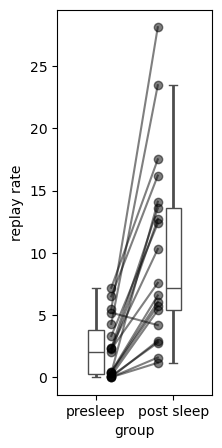

In [41]:
post_master = ED5_data_dict['post_dict']  
presleep_master = ED5_data_dict['pre_dict']  
 
POST_reactivations_per_min = post_master['reactivations_per_min']
PRE_reactivations_per_min = presleep_master['reactivations_per_min']
# replace nan values with 0
POST_reactivations_per_min = [0 if np.isnan(item) else item for item in POST_reactivations_per_min]
PRE_reactivations_per_min = [0 if np.isnan(item) else item for item in PRE_reactivations_per_min]   

fig, ax = plt.subplots(1, 1, figsize=(2, 5))
pairwise_diffs = []
for index,mir in enumerate(presleep_master['animal_ID']):
    pre_events = PRE_reactivations_per_min[index]
    if mir in post_master['animal_ID']:
        post_events = np.array(post_master['reactivations_per_min'])[np.array(post_master['animal_ID']) == mir][0]
        ax.plot([0.2,0.8],[pre_events,post_events],'o-', color = 'k', alpha = 0.5)
        pairwise_diffs += [post_events - pre_events]

        
ps_rr = post_master['reactivations_per_min']
        
plt_df = pd.DataFrame({'group': (['presleep'] * len(PRE_reactivations_per_min)) + (['post sleep'] * len(ps_rr)) , 'replay rate': list(PRE_reactivations_per_min)+list(ps_rr)})
ax = sns.boxplot(y='replay rate', x='group', data=plt_df, color='blue', width=.2, zorder=10,
                    showcaps=True, boxprops={'facecolor': 'none', "zorder": 10},
                    showfliers=False, whiskerprops={'linewidth': 2, "zorder": 10},
                    saturation=1, orient='v')

# figure I


One-sample t-test on differences: t=2.391, p=0.0303
Mean diff = 0.084, 95% CI = [0.016, 0.151]
Cohen's d = 0.598, Hedges' g = 0.573


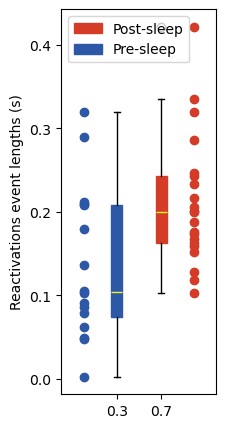

In [42]:
expert_event_lens = post_master['post_event_lens']
presleep_event_lens = presleep_master['pre_event_lens']

##############################################

fig, ax = plt.subplots(figsize=(2, 5))

ax.plot(np.ones(len(expert_event_lens)), expert_event_lens, 'o', color = '#D43C27')
ax.boxplot(expert_event_lens, positions=[0.7], widths=0.1, patch_artist=True, boxprops=dict(facecolor='#D43C27', color='#D43C27'), medianprops=dict(color="#ECF724"), label = 'Post-sleep')

ax.plot(np.zeros(len(presleep_event_lens)), presleep_event_lens, 'o', color = '#2D58A7')
ax.boxplot([x for x in presleep_event_lens if not np.isnan(x)], positions=[0.3], widths=0.1, patch_artist=True, boxprops=dict(facecolor='#2D58A7', color='#2D58A7'), medianprops=dict(color='#ECF724'), label = 'Pre-sleep')

ax.set_ylabel('Reactivations event lengths (s)')
ax.legend()

### STATS

# remove the ones that dont have presleep 
indices_to_remove = [2, 5]  
_expert_event_lens = [item for i, item in enumerate(expert_event_lens) if i not in indices_to_remove]

diff = np.array(np.array(_expert_event_lens)- np.array(presleep_event_lens))

# One-sample t-test (are differences != 0?) ---
t_stat, t_p = stats.ttest_1samp(diff, popmean=0, nan_policy='omit')
mean_diff = np.nanmean(diff)
sd_diff = np.nanstd(diff, ddof=1)

# 95% CI for mean difference
n = len(diff)
se = sd_diff / np.sqrt(n)
ci_low, ci_high = stats.t.interval(0.95, df=n-1, loc=mean_diff, scale=se)

print(f"\nOne-sample t-test on differences: t={t_stat:.3f}, p={t_p:.3g}")
print(f"Mean diff = {mean_diff:.3f}, 95% CI = [{ci_low:.3f}, {ci_high:.3f}]")

# --- Effect size: Cohen's d & Hedges' g ---
cohens_d = mean_diff / sd_diff
J = 1 - (3 / (4*(n-1) - 1))  # small sample correction
hedges_g = cohens_d * J
print(f"Cohen's d = {cohens_d:.3f}, Hedges' g = {hedges_g:.3f}")


# figure J

Fitted parameters: a = 0.03267556939789752, b = 3.21309210901926
R-squared: 0.9926259080124209
p-values: [np.float64(1.7030314393595702e-05), np.float64(1.1325253623795106e-08)]
Fitted parameters: a = 0.07223591752748802, b = 2.524889344927888
R-squared: 0.9722874493393596
p-values: [np.float64(0.00018568244349270735), np.float64(1.3534977050255748e-06)]


Text(0.5, 1.0, 'AP5 vs Saline')

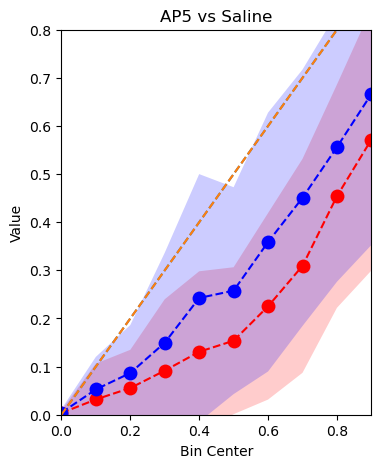

In [43]:


fig, ax = plt.subplots(1, 1,figsize=(4, 5))
late_awake_sleep_relationship = post_master['late_awake_sleep_relationship']
# Convert keys to integers
late_awake_sleep_relationship = {float(k): v for k, v in late_awake_sleep_relationship.items()}
plot_awake_sleep_relationship(late_awake_sleep_relationship,'red',ax)
early_awake_sleep_relationship = presleep_master['early_awake_sleep_relationship']
# Convert keys to integers
early_awake_sleep_relationship = {float(k): v for k, v in early_awake_sleep_relationship.items()}
ax.set_xlim(0,0.9)
plot_awake_sleep_relationship(early_awake_sleep_relationship,'blue',ax)
ax.set_title('AP5 vs Saline')